In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from skimage import io,color
from skimage.util import img_as_ubyte


## 1.Loading and displaying the original image 

In [2]:
# loading and displaying the original image 

In [3]:
image = io.imread("DSC_0227.JPG")
image.shape

(4000, 6000, 3)

In [4]:
image

array([[[217, 220, 225],
        [216, 219, 224],
        [216, 219, 224],
        ...,
        [191, 195, 206],
        [189, 193, 204],
        [187, 191, 202]],

       [[215, 218, 223],
        [216, 219, 224],
        [216, 219, 224],
        ...,
        [191, 195, 206],
        [191, 195, 207],
        [191, 195, 207]],

       [[216, 219, 224],
        [217, 220, 225],
        [217, 220, 225],
        ...,
        [189, 193, 205],
        [189, 193, 205],
        [190, 194, 206]],

       ...,

       [[ 99, 100,  92],
        [100, 101,  93],
        [101, 104,  97],
        ...,
        [ 78,  76,  77],
        [ 75,  73,  74],
        [ 73,  71,  72]],

       [[105, 106,  98],
        [106, 107,  99],
        [107, 108, 100],
        ...,
        [ 76,  74,  75],
        [ 73,  71,  72],
        [ 71,  69,  70]],

       [[103, 104,  96],
        [105, 106,  98],
        [107, 108, 100],
        ...,
        [ 75,  73,  74],
        [ 72,  70,  71],
        [ 71,  69,  70]]

## 2.Converting the image to grary scale image

In [5]:
gray_image = color.rgb2gray(image)
gray_image

array([[0.86165882, 0.85773725, 0.85773725, ..., 0.76448275, 0.75663961,
        0.74879647],
       [0.85381569, 0.85773725, 0.85773725, ..., 0.76448275, 0.76476549,
        0.76476549],
       [0.85773725, 0.86165882, 0.86165882, ..., 0.75692235, 0.75692235,
        0.76084392],
       ...,
       [0.38906157, 0.39298314, 0.40336392, ..., 0.29998863, 0.28822392,
        0.28038078],
       [0.41259098, 0.41651255, 0.42043412, ..., 0.29214549, 0.28038078,
        0.27253765],
       [0.40474784, 0.41259098, 0.42043412, ..., 0.28822392, 0.27645922,
        0.27253765]])

In [6]:
gray_image.shape

(4000, 6000)

Text(0.5, 1.0, 'Original image')

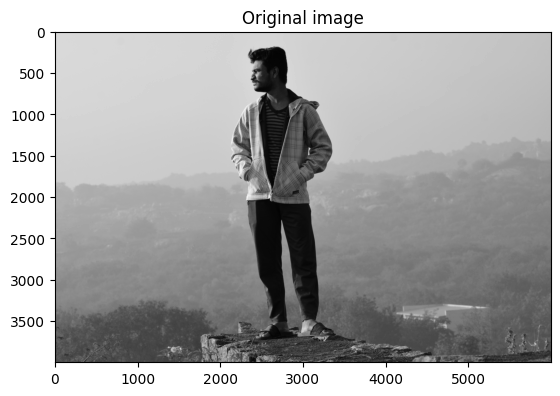

In [7]:
plt.imshow(gray_image,cmap="gray")
plt.title("Original image")

In [8]:
#flattened_image=gray_image.reshape(gray_image.shape[0],-1)
#flattened_image

## 3.creating pca object

In [9]:
pca = PCA(n_components=0.95)

In [10]:
transformed_image = pca.fit_transform(gray_image)

In [11]:
reconstructed_image = pca.inverse_transform(transformed_image)

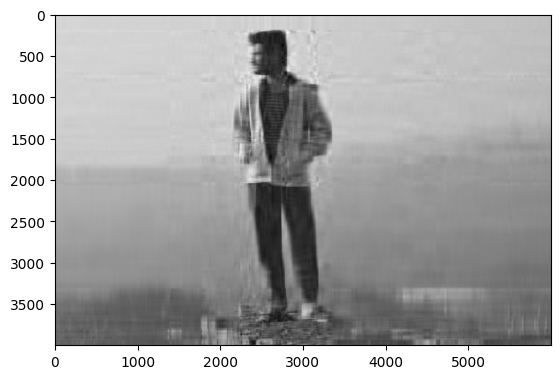

In [12]:
plt.imshow(reconstructed_image,cmap="gray")

In [13]:
# Normalize the data
compressed_image_normalize =(reconstructed_image - reconstructed_image.min())/(reconstructed_image.max() - reconstructed_image.min())
compressed_image_normalize

array([[0.83245809, 0.83258212, 0.8326929 , ..., 0.74746099, 0.74788228,
        0.74748689],
       [0.83281103, 0.83293318, 0.83304038, ..., 0.74788454, 0.74831776,
        0.74792853],
       [0.83243364, 0.83254615, 0.83263295, ..., 0.74747686, 0.74791319,
        0.74752609],
       ...,
       [0.41617426, 0.41219572, 0.41056195, ..., 0.37936786, 0.37817686,
        0.37793506],
       [0.41677179, 0.41287438, 0.41140037, ..., 0.38292179, 0.38179948,
        0.38167214],
       [0.41847451, 0.4146267 , 0.41327527, ..., 0.38760042, 0.38647902,
        0.38647841]])

In [14]:
compressed_image_normalize.max()

np.float64(1.0)

In [15]:
convert_image_bit = img_as_ubyte(compressed_image_normalize)

In [16]:
io.imsave("compressed_image.jpg",convert_image_bit)